In [1]:
import os
if not(os.path.isfile("/kaggle/working/images.tar.gz")):
    !wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
    !wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2023-11-30 07:31:01--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2023-11-30 07:31:01--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.0MB/s    in 38s     

2023-11-30 07:31:40 (19.8 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-11-30 07:31:41--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.

In [2]:
if not(os.path.exists("/kaggle/working/images")):
    !tar -xvf  '/kaggle/working/images.tar.gz'
    !tar -xvf '/kaggle/working/annotations.tar.gz'

images/
images/boxer_16.jpg
images/chihuahua_165.jpg
images/pug_183.jpg
images/english_setter_1.jpg
images/chihuahua_170.jpg
images/english_cocker_spaniel_17.jpg
images/samoyed_39.jpg
images/Egyptian_Mau_62.jpg
images/samoyed_36.jpg
images/german_shorthaired_3.jpg
images/Ragdoll_183.jpg
images/British_Shorthair_64.jpg
images/american_pit_bull_terrier_57.jpg
images/beagle_120.jpg
images/american_bulldog_174.jpg
images/chihuahua_101.jpg
images/shiba_inu_136.jpg
images/Abyssinian_136.jpg
images/Siamese_201.jpg
images/Abyssinian_85.jpg
images/saint_bernard_145.jpg
images/Siamese_63.jpg
images/leonberger_164.jpg
images/Maine_Coon_126.jpg
images/samoyed_51.jpg
images/Birman_15.jpg
images/english_cocker_spaniel_181.jpg
images/english_cocker_spaniel_128.jpg
images/leonberger_133.jpg
images/english_cocker_spaniel_6.jpg
images/miniature_pinscher_119.jpg
images/american_pit_bull_terrier_27.jpg
images/Abyssinian_37.jpg
images/Bombay_91.jpg
images/Egyptian_Mau_6.jpg
images/Maine_Coon_173.jpg
images

In [3]:
!head /kaggle/working/annotations/list.txt

#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images
Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1


In [4]:
# Specify the path to your text file
file_path = "/kaggle/working/annotations/list.txt"

with open(file_path, 'r') as file:
    line_count = sum(1 for line in file)

if line_count == 7355:
    # Read the content of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Remove the first six lines
    new_lines = lines[6:]

    # Write the updated content back to the file
    with open(file_path, 'w') as file:
        file.writelines(new_lines)

In [5]:
!head /kaggle/working/annotations/list.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1


In [9]:
import pandas as pd

df = pd.read_csv('/kaggle/working/annotations/list.txt', delimiter = " ", names = ['file_name', 'label_id', 'species', 'breed_id'])

df.head()


,file_name,label_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [16]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
import glob


dir_name='/kaggle/working/images/*'

pets_files = glob.glob(dir_name)
pets_df = pd.DataFrame(pets_files)
pets_df.columns =['full_path']
pets_df['file'] = pets_df['full_path'].str.split('images/').str[1]
pets_df['file_name'] = pets_df['full_path'].str.split('images/').str[1].str.replace('.jpg', '')
pets_df['label_name'] = pets_df['file_name'].apply(lambda x: x.rsplit('_', 1)[0])

pets_df = pets_df.merge(df, left_on='file_name',right_on='file_name')


classNames = pets_df.label_name.unique()
pets_df.head(10)

,full_path,file,file_name,label_name,label_id,species,breed_id
0,/kaggle/working/images/wheaten_terrier_56.jpg,wheaten_terrier_56.jpg,wheaten_terrier_56,wheaten_terrier,36,2,24
1,/kaggle/working/images/Sphynx_105.jpg,Sphynx_105.jpg,Sphynx_105,Sphynx,34,1,12
2,/kaggle/working/images/great_pyrenees_200.jpg,great_pyrenees_200.jpg,great_pyrenees_200,great_pyrenees,16,2,10
3,/kaggle/working/images/Bengal_179.jpg,Bengal_179.jpg,Bengal_179,Bengal,6,1,2
4,/kaggle/working/images/shiba_inu_141.jpg,shiba_inu_141.jpg,shiba_inu_141,shiba_inu,32,2,22
5,/kaggle/working/images/wheaten_terrier_163.jpg,wheaten_terrier_163.jpg,wheaten_terrier_163,wheaten_terrier,36,2,24
6,/kaggle/working/images/Russian_Blue_89.jpg,Russian_Blue_89.jpg,Russian_Blue_89,Russian_Blue,28,1,10
7,/kaggle/working/images/pomeranian_159.jpg,pomeranian_159.jpg,pomeranian_159,pomeranian,25,2,17
8,/kaggle/working/images/Bombay_87.jpg,Bombay_87.jpg,Bombay_87,Bombay,8,1,4
9,/kaggle/working/images/Sphynx_175.jpg,Sphynx_175.jpg,Sphynx_175,Sphynx,34,1,12


In [17]:
print(pets_df.shape)

(7349, 7)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Assuming pets_df is your original dataframe
# Split the dataframe into training and validation sets
train_df, valid_df = train_test_split(pets_df, test_size=0.2, random_state=42)

# Create a copy of the training dataframe for augmentation
augmented_train_df = train_df.copy()

datagen = image.ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create an ImageDataGenerator for augmentation
augmentation_datagen = image.ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images for the copied training dataframe
augmented_train_generator = augmentation_datagen.flow_from_dataframe(
    dataframe=augmented_train_df,
    directory='/kaggle/working/images',
    x_col='file',
    y_col='label_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=128,
    seed=42  # Set seed for reproducibility
)

# Concatenate the original and augmented dataframes for training
final_train_df = pd.concat([train_df, augmented_train_df])

# Create generators for training and validation using the concatenated dataframes
final_train_generator = datagen.flow_from_dataframe(
    dataframe=final_train_df,
    directory='/kaggle/working/images',
    x_col='file',
    y_col='label_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=128,
    seed=42  # Set seed for reproducibility
)

final_validation_generator = datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory='/kaggle/working/images',
    x_col='file',
    y_col='label_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=128,
    seed=42
)


Found 5879 validated image filenames belonging to 37 classes.
Found 11758 validated image filenames belonging to 37 classes.
Found 1470 validated image filenames belonging to 37 classes.


{'saint_bernard'}


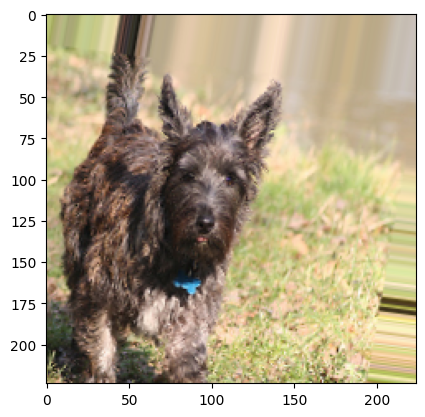

{'Abyssinian'}


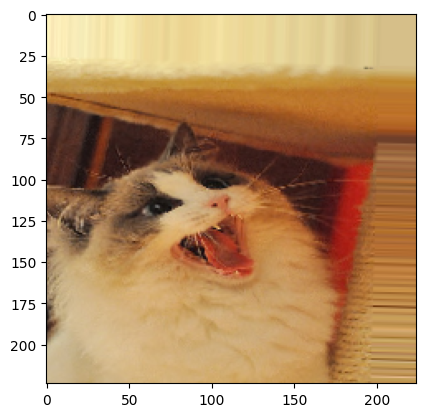

In [48]:
from matplotlib import pyplot as plt
xtbatches , ytbatches = next(final_train_generator)
for i in range (0,2):
    image1 = xtbatches[i]
    print({classNames[ytbatches[i].argmax()]})
    plt.imshow(image1)
    plt.show()

# create the model

In [51]:
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
import keras
from keras import optimizers, models, layers

def create_model(trainable):
    resnet50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
    ResNet = hub.KerasLayer(resnet50, trainable = trainable)
    tf.keras.backend.clear_session()

    data = tf.keras.Input(shape=(224,224,3)) # input shape
    L1 = ResNet(data) # ResNet layer


    # relu bood ke 89% acc dad
    # sigmoid zadam acc shod 79%

    L2 = Dense(64, activation='relu')(L1) # Fully conected layer
    L2 = Dropout(0.3)(L2) # for reducing overfitting

    L3 = Dense(64, activation='relu')(L2) # Fully conected layer
    L3 = Dropout(0.3)(L3)

    out = Dense(37, activation='softmax')(L3) # Output layer for classification

    model = tf.keras.Model(data, out) # build model

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
#         decay_steps=10,
        decay_steps=10000,
        decay_rate=0.9)

    #TODO: l2 regularization

    # optimizerSGD = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
    optimizerAdam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizerAdam, metrics = ['accuracy']) # config model
    return model

model = create_model(False)
model.summary()

# for monitoring with TensorBoard notebook
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 64)                64128     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 37)                2405  

In [52]:
# from tensorflow.python.keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# import pydot
# import graphviz

# SVG(model_to_dot(
#     model, show_shapes=True, show_layer_names=True, rankdir='TB',
#     expand_nested=False, dpi=60, subgraph=False
# ).create(prog='dot',format='svg'))

In [54]:
def plot_acc_loss():    
    print(history.history.keys())
    # summarize history for accuracy
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# run model

In [55]:
history = model.fit(
    final_train_generator,
    validation_data = final_validation_generator,
    epochs=10,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
92/92 [==============================] - 210s 2s/step - loss: 1.1527 - accuracy: 0.6521 - val_loss: 0.6937 - val_accuracy: 0.7735
Epoch 3/10
92/92 [==============================] - 209s 2s/step - loss: 1.0602 - accuracy: 0.6762 - val_loss: 0.6854 - val_accuracy: 0.7707
Epoch 4/10
92/92 [==============================] - 211s 2s/step - loss: 1.0118 - accuracy: 0.6940 - val_loss: 0.6320 - val_accuracy: 0.7980
Epoch 5/10
92/92 [==============================] - 212s 2s/step - loss: 1.0210 - accuracy: 0.6915 - val_loss: 0.6406 - val_accuracy: 0.7952
Epoch 6/10
92/92 [==============================] - 210s 2s/step - loss: 0.9968 - accuracy: 0.7055 - val_loss: 0.6220 - val_accuracy: 0.8054
Epoch 7/10
92/92 [==============================] - 210s 2s/step - loss: 1.0033 - accuracy: 0.7031 - val_loss: 0.6106 - val_accuracy: 0.8122
Epoch 8/10
92/92 [==============================] - 209s 2s/step - loss: 0.9270 - accuracy: 0.7261 - val_loss: 0.6038 - val_accuracy: 0.8027
Epoch 9/10
92

# save model

In [56]:
checkpoint_path = "/kaggle/working/training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model.save_weights(checkpoint_path.format(epoch=0))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


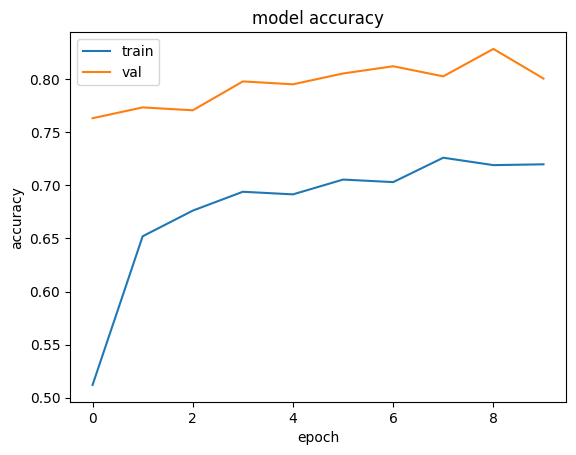

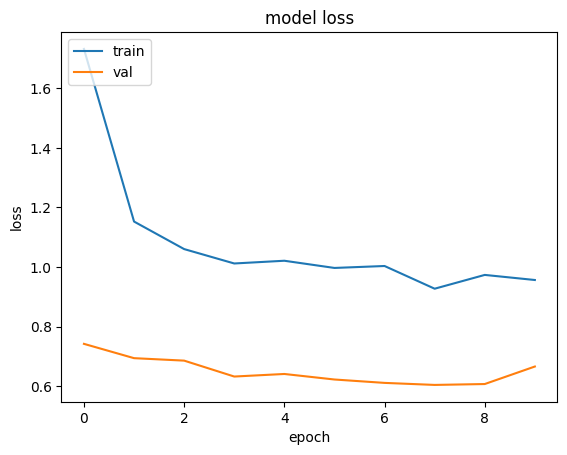

In [57]:
plot_acc_loss()

# Create a new model instance

with unfreezing for the ResNet_V2

In [63]:
# model = create_model(True)

In [64]:
# model.summary()

# Load the previously saved weights


In [65]:
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# model.load_weights(latest)

In [66]:
# history = model.fit(
#     final_train_generator,
#     validation_data = final_validation_generator,
#     epochs=10,
#     callbacks=[tensorboard_callback]
# )

In [58]:
%reload_ext tensorboard
logs_base_dir = "/kaggle/working/logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

4/4 [==============================] - 1s 52ms/step
Predicted Class: Birman
Correct Class : Birman


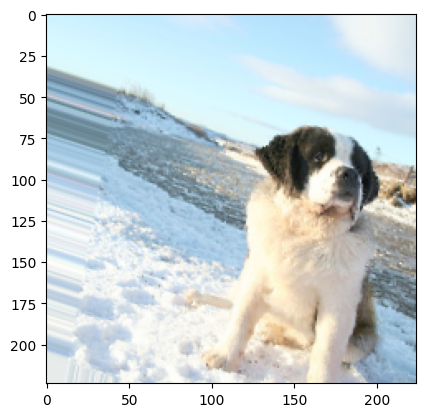

Predicted Class: american_bulldog
Correct Class : Birman


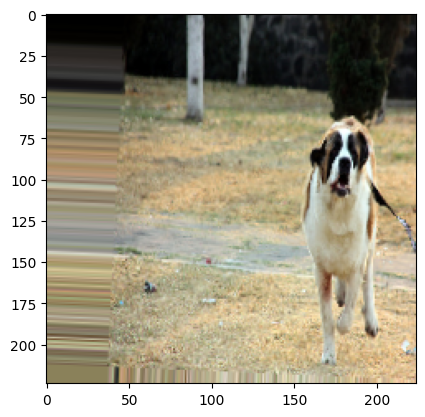

In [59]:
X_test, y_test = next(final_validation_generator)
y_proba = model.predict(X_test)
# for i in range(len(y_proba)):
for i in range(0,2):
    classFinal = y_proba[i].argmax()
    print(f'Predicted Class: {classNames[classFinal]}')
    print(f'Correct Class : {classNames[y_test[i].argmax()]}')
    plt.imshow(X_test[i])
    plt.show()

In [60]:
import numpy
final_validation_generator.reset()
X_test,y_test = next(final_validation_generator)
for i in range(0,(numpy.math.ceil(final_validation_generator.samples / final_validation_generator.batch_size)-1)):
  img, label = next(final_validation_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(1470, 224, 224, 3) (1470, 37)


In [61]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy

test_steps_per_epoch = numpy.math.ceil(final_validation_generator.samples / final_validation_generator.batch_size)

#predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
predictions = model.predict(X_test)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = numpy.argmax(y_test, axis=1)
class_labels = list(final_validation_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


46/46 [==============================] - 3s 50ms/step
                            precision    recall  f1-score   support

                Abyssinian       0.64      0.84      0.73        44
                    Bengal       0.34      0.35      0.35        40
                    Birman       0.91      0.57      0.70        35
                    Bombay       0.89      0.89      0.89        36
         British_Shorthair       0.84      0.57      0.68        37
              Egyptian_Mau       0.62      0.81      0.71        37
                Maine_Coon       0.90      0.73      0.81        37
                   Persian       0.79      0.82      0.81        28
                   Ragdoll       0.72      0.88      0.79        33
              Russian_Blue       0.75      0.77      0.76        39
                   Siamese       0.65      0.95      0.77        38
                    Sphynx       0.91      0.66      0.76        44
          american_bulldog       0.72      0.68      0.70    

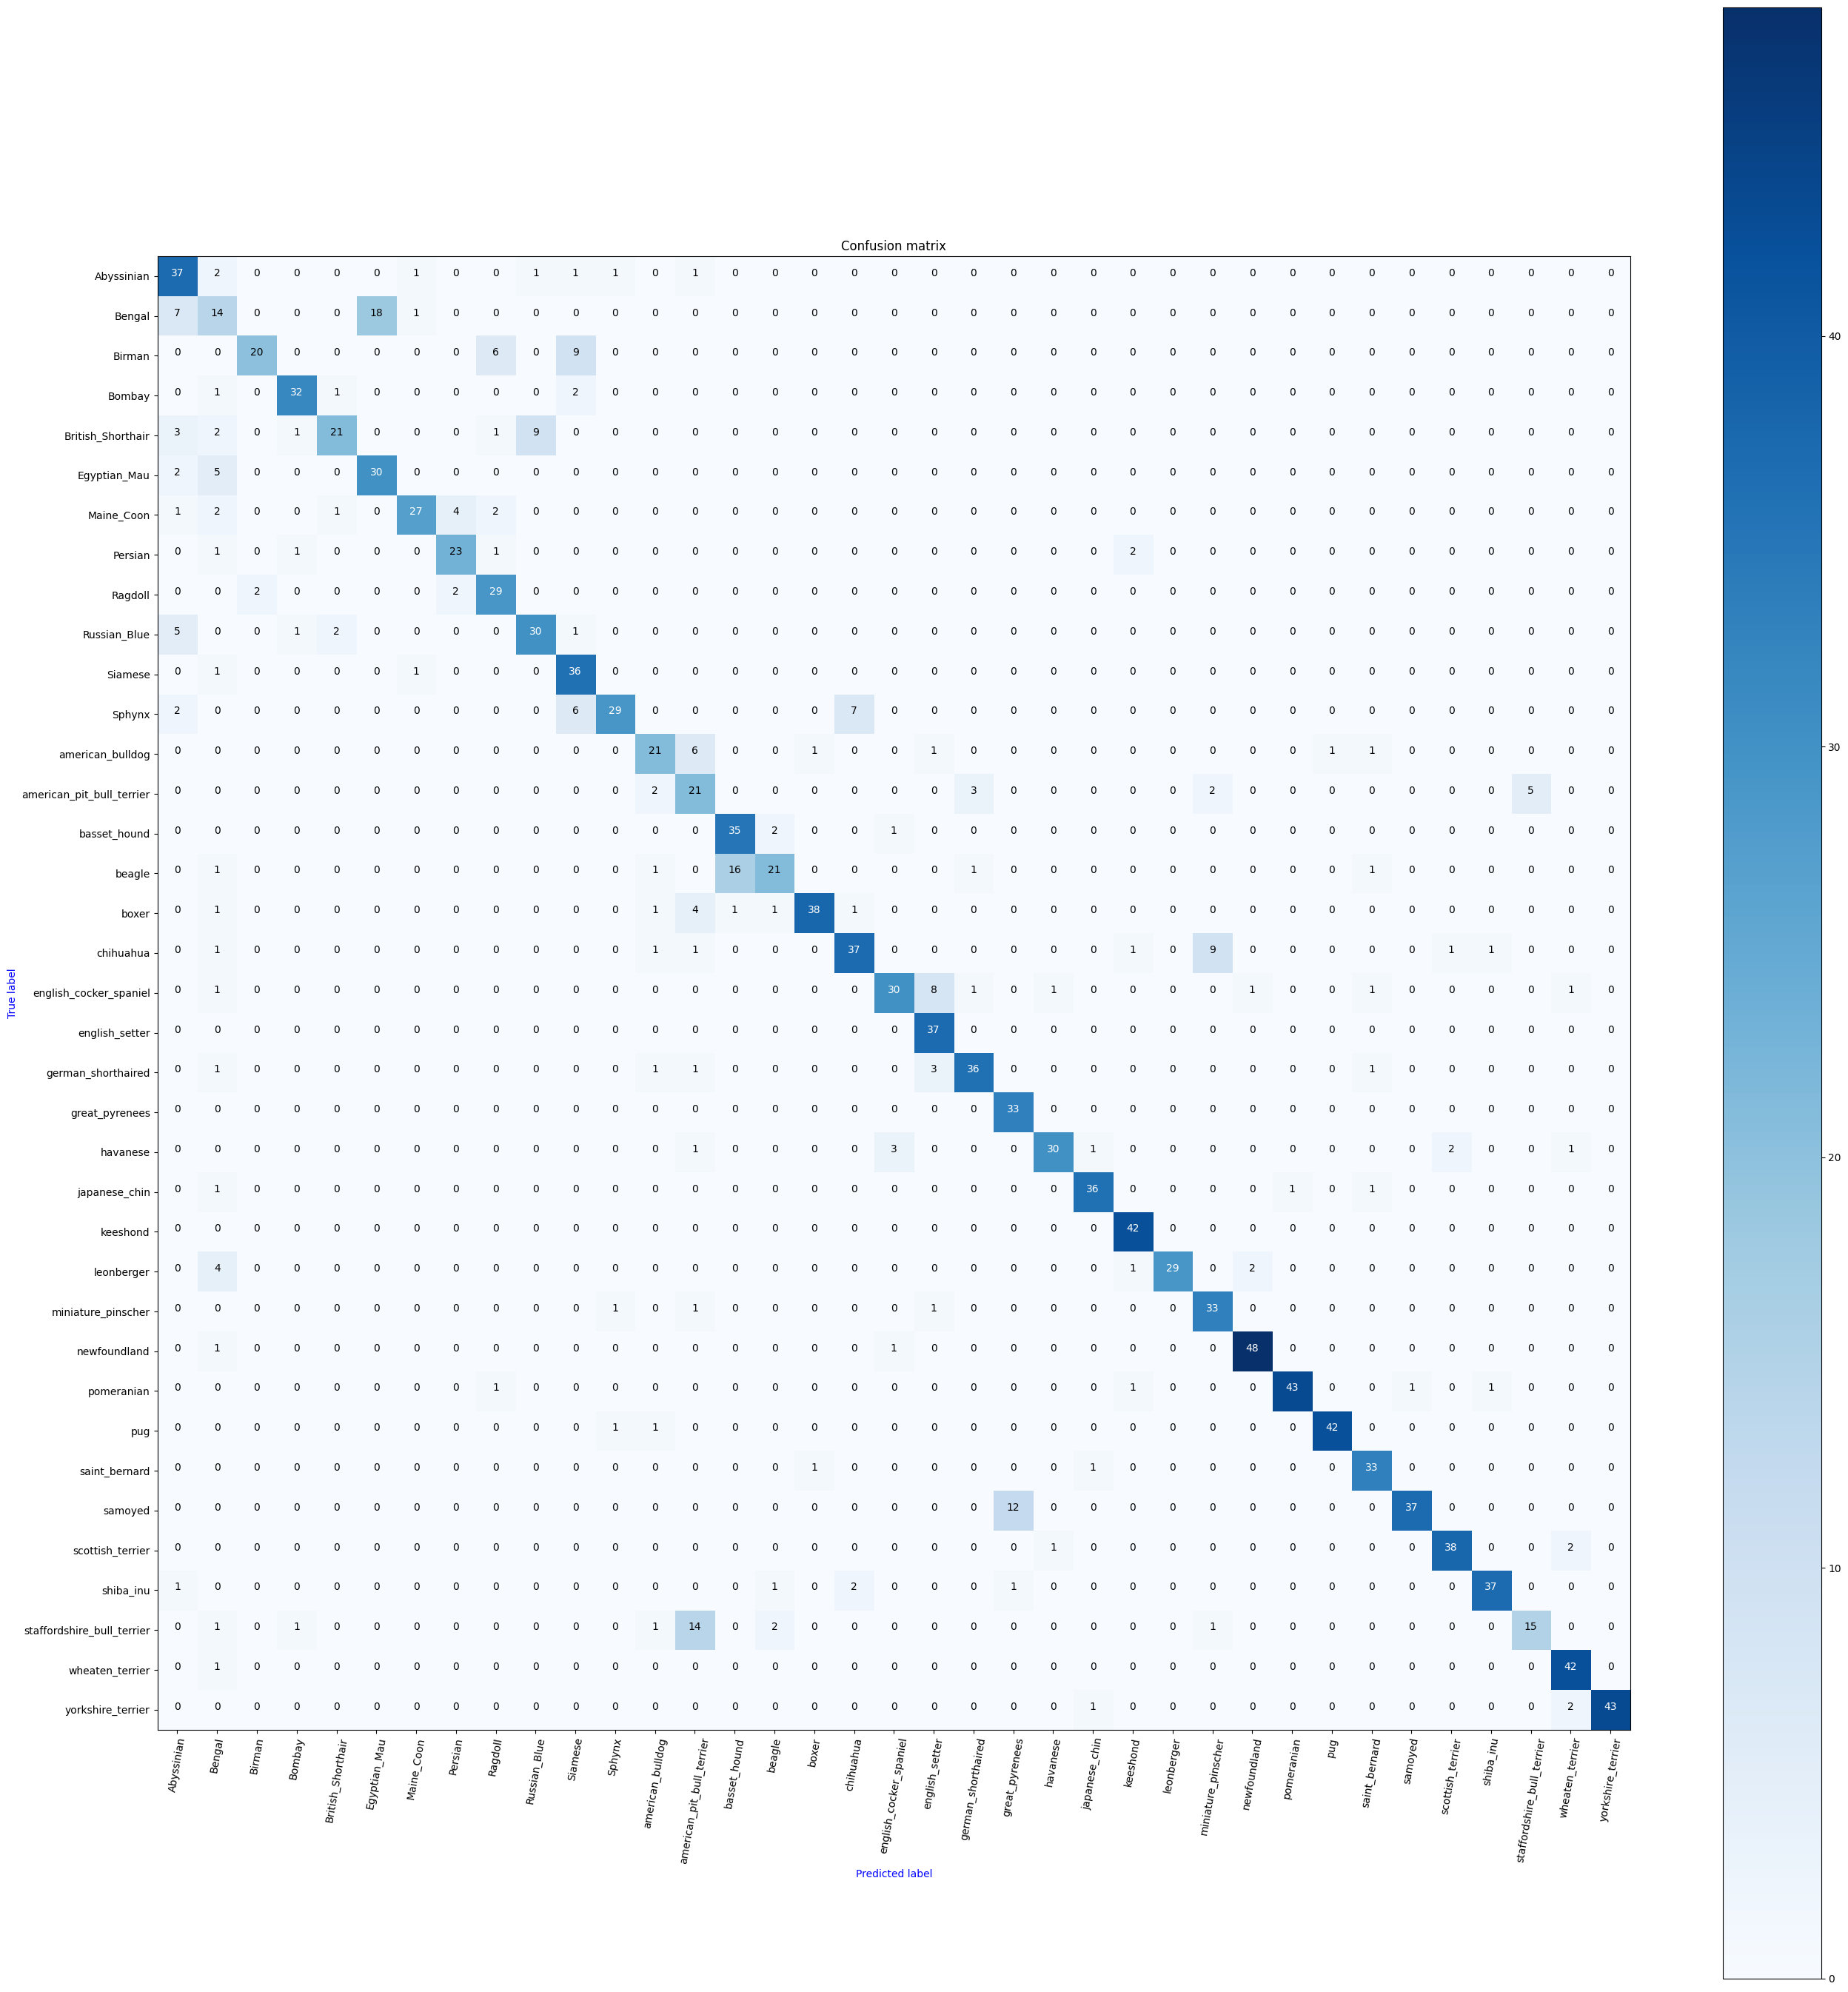

In [62]:

confusion_mtx = confusion_matrix(true_classes, predicted_classes)



# compute the confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(27,27))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',color='blue')
    plt.xlabel('Predicted label',color='blue')


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = class_labels, title="Confusion matrix")
